In [0]:
import torch

In [29]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print("size: ",x.size()) 
print("shape: ",x.shape)
print("rank(차원) : ",x.ndimension())

size:  torch.Size([3, 3])
shape:  torch.Size([3, 3])
rank(차원) :  2


In [30]:
##차원 늘리기 
x= torch.unsqueeze(x,0)
print(x)
print("size",x.size())
print("shape",x.shape)
print("rank(차원)",x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
size torch.Size([1, 3, 3])
shape torch.Size([1, 3, 3])
rank(차원) 3


In [31]:
## rank 줄이기
x= torch.squeeze(x) ## rank중 크기가 1인 랭크를 삭제 
print(x)
print("shape :",x.shape)
print("rank : ",x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
shape : torch.Size([3, 3])
rank :  2


In [32]:
x = x.view(9)
print(x)
print("size",x.size())
print("shape",x.shape)
print("rank(차원)",x.ndimension())

## squeeze, unsqueeze,view -> 텐서의 원소수를 그대로 유지하면서 모양과 차원을 조절

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
size torch.Size([9])
shape torch.Size([9])
rank(차원) 1


In [38]:
try :
  x= x.view(2,9)
  print(x)
except Exception as e:
  print(e)

shape '[2, 9]' is invalid for input of size 9


In [41]:
## 행렬 

w = torch.randn(5,3,dtype=torch.float) ##정규분포에서 무작위로 뽑기 [5,3]
x = torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])

print("w size : ",w.size())
print("x size :" , x.size())
print("w", w)
print("x", x)

w size :  torch.Size([5, 3])
x size : torch.Size([3, 2])
w tensor([[-1.8750,  0.1238, -1.3625],
        [-0.1378, -0.0313,  0.5198],
        [-0.5325,  0.0151, -0.9855],
        [ 0.4304,  0.7579, -0.3053],
        [ 2.1282, -2.5498, -0.4311]])
x tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [42]:
b= torch.randn(5,2,dtype=torch.float)
print("b size", b.size())
print("b ",b)

b size torch.Size([5, 2])
b  tensor([[-2.0468,  0.1555],
        [ 0.4673, -1.6186],
        [-1.2483, -1.1508],
        [-1.2558,  0.6390],
        [-0.5176, -0.2301]])


In [45]:
wx = torch.mm(w,x)
print("ws size",wx.size())
print("ws ",wx)

result =wx+b
print("result size",result.size())
print("result :",result)

ws size torch.Size([5, 2])
ws  tensor([[ -8.3163, -11.4300],
        [  2.3673,   2.7180],
        [ -5.4149,  -6.9179],
        [  1.1775,   2.0605],
        [ -7.6765,  -8.5292]])
result size torch.Size([5, 2])
result : tensor([[-10.3631, -11.2745],
        [  2.8346,   1.0994],
        [ -6.6632,  -8.0687],
        [ -0.0783,   2.6995],
        [ -8.1941,  -8.7593]])


In [48]:
##autograd

w = torch.tensor(1.0,requires_grad=True) 
## require grade ==true -> autograde 기능이 자동으로 
## 계산할때 w에 대한 미분값을 w.grade에 저장}

print("w ",w)
a=w*3
l =a**2

l.backward()
print("l을 w로 미분한 값은 {}".format(w.grad))

w  tensor(1., requires_grad=True)
l을 w로 미분한 값은 18.0


In [0]:
"""
진짜 image -> weird_function() -> 오염된 이미지
random하게 만든 image -> weird_function() -> 랜덤 오염이미지
오염된 이미지 == 랜덤 오염이미지 -> 진짜 image == random하게만든 이미지
오염된 이미지와 랜덤 오염이미지 차이를 backpropagation해서 학습 
"""

In [50]:
import pickle
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


broken_imagesize  torch.Size([10000])


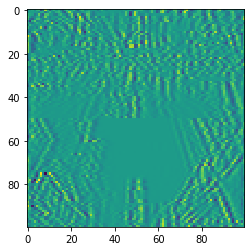

In [67]:
broken_image_url = "/content/gdrive/My Drive/Colab Notebooks/pytorch/broken_image_t.p" #FIXME
broken_image = torch.FloatTensor(pickle.load(open(broken_image_url,'rb'),encoding='latin1'))
print("broken_imagesize ",broken_image.shape)
plt.imshow(broken_image.view(100,100))

In [0]:
def weird_function(x, n_iter=5):
  h = x    
  filt = torch.tensor([-1./3, 1./3, -1./3])
  for i in range(n_iter):
      zero_tensor = torch.tensor([1.0*0])
      h_l = torch.cat( (zero_tensor, h[:-1]), 0)
      h_r = torch.cat((h[1:], zero_tensor), 0  )
      h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
      if i % 2 == 0:
          h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
  return h
def distance_loss(hypothesis, broken_image):

  return torch.dist(hypothesis, broken_image)

loss at 0 = 12.142587661743164
loss at 1000 = 1.1316078901290894
loss at 2000 = 0.546210765838623
loss at 3000 = 0.3806820809841156
loss at 4000 = 0.3014898896217346
loss at 5000 = 0.2526097893714905
loss at 6000 = 0.21773818135261536
loss at 7000 = 0.19027666747570038
loss at 8000 = 0.16709430515766144
loss at 9000 = 0.14656955003738403
loss at 10000 = 0.12780389189720154
loss at 11000 = 0.11026813834905624
loss at 12000 = 0.09362998604774475
loss at 13000 = 0.07767033576965332
loss at 14000 = 0.06223845109343529
loss at 15000 = 0.047228991985321045
loss at 16000 = 0.03256717324256897
loss at 17000 = 0.021133968606591225
loss at 18000 = 0.0211651511490345
loss at 19000 = 0.02116743102669716


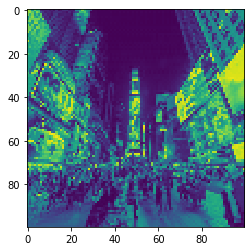

In [73]:
random_tensor = torch.randn(10000,dtype=torch.float)
lr = 0.8

for i in range(0,20000):
  random_tensor.requires_grad_(True)
  hypothesis = weird_function(random_tensor)
  loss = distance_loss(hypothesis,broken_image)
  loss.backward()
  with torch.no_grad(): ## 파이토치의 자동 기울기 계산을 비활성화 
    random_tensor = random_tensor - lr*random_tensor.grad
  ## random_tensor.grad -> loss.backword()에서 계산한 loss의 기울기==loss가 최댓점이 되는 곳의 방향
  if i %1000 ==0:
    print('loss at {} = {}'.format(i,loss.item()))

plt.imshow(random_tensor.view(100,100).data)
